In [12]:
import os 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import json 
from math import sqrt
import math
import random
#Ипортируем необходимые данных для работы симуляции 

In [361]:
class Simulation:
    def __init__(self, speed, density, time, z_index, user):
        self.speed = speed
        self.density = density
        self.time = time
        self.z_index = z_index
        self.user = user
        
        
    def CreateTrace(self):
        range_degrees = np.arange(0.0, 360.0, self.density)
        range_goals_chunk = []
#         We create KeyPoints of flying for fast rendering, but still can make it more compress
        range_goals = []
        for d in range_degrees:
            x = 2*np.sin(np.deg2rad(d))
            y = 2*np.cos(np.deg2rad(d))
            z = self.z_index
            c = 'red'
            range_goals.append((x,y,z,c))
        range_goals_chunk.append(range_goals)
        
        range_goals = []
        for d in range_degrees:
            x = 5*np.sin(np.deg2rad(d))
            y = 5*np.cos(np.deg2rad(d))
            z = self.z_index
            c = 'blue'
            range_goals.append((x,y,z,c))
        range_goals_chunk.append(range_goals)
        
        range_goals = []
        for d in range_degrees:
            x = 7*np.sin(np.deg2rad(d))
            y = 7*np.cos(np.deg2rad(d))
            z = self.z_index
            c = 'green'
            range_goals.append((x,y,z,c))
        range_goals_chunk.append(range_goals)
            
        return range_goals_chunk
    
    def ShowPath(self, goals_chunk):
        figure = plt.figure()
        ax = figure.add_subplot(111, projection='3d')
        for goals in goals_chunk:
            for goal in goals:
                x = goal[0]
                y = goal[1]
                z = goal[2]
                color = goal[3]
                ax.scatter(goal[0], goal[1], goal[2], marker='o', c=color, s=5)
                
#         Place user in init settings place 
            ax.scatter(self.user[0], self.user[1], self.user[2], marker='o', c=color, s=5)
            ax.set_xlabel('X Label')
            ax.set_ylabel('Y Label')
            ax.set_zlabel('Z Label')

        plt.show()
        
    def GetDistance(self, goals_chunk):
#         𝑟𝑖=√(𝑥𝑖−𝑥𝑢)^2+(𝑦𝑖−𝑦𝑢)^2+(𝑧𝑖−𝑧𝑢)^2
        user_distnce_for_all = []
    
        xu = self.user[0]
        yu = self.user[1]
        zu = self.user[2]
                
        for goals in goals_chunk:
            user_distnce_ones = []
            for goal in goals:
                xi = goal[0]
                yi = goal[1]
                zi = goal[2]
                
#                 Create formulla r
                r = sqrt((xi-xu)**2+(yi-yu)**2+(zi-zu)**2)
                user_distnce_ones.append(r)
            user_distnce_for_all.append(user_distnce_ones)
        return user_distnce_for_all
    
    def RandomWalking(self):
        range_degrees = np.arange(0.0, 360.0, self.density)
        range_goals_chunk = []
        range_goals = [[0],[0],[self.z_index]]
        range_border = [[],[],[]]
        radius = 15
        step = 0.2
#         Create Plot
        figure = plt.figure()
        ax = figure.add_subplot(111, projection='3d')
        
#         Generate BPLA positions randomly
        for x in range(0,10000):
        
#         Create point using priv point (to share speed)
            random_point = random.random()*360
            
            
            x = step*np.sin(np.deg2rad(random_point))+range_goals[0][-1]
            y = step*np.cos(np.deg2rad(random_point))+range_goals[1][-1]
            z = self.z_index
            c = 'red'
            
            if ((x - 0)**2 + (y - 0)**2) < radius**2:
                range_goals[0].append(x)
                range_goals[1].append(y)
                range_goals[2].append(z)
                
                range_goals_chunk.append((x,y,z))
            else:
                xn = (step*np.sin(np.deg2rad(random_point))*-1)+range_goals[0][-1]
                yn = (step*np.cos(np.deg2rad(random_point))*-1)+range_goals[1][-1]
                range_goals[0].append(xn)
                range_goals[1].append(yn)
                range_goals[2].append(z)
                range_goals_chunk.append((xn,yn,z))
                

        ax.plot(range_goals[0],range_goals[1],range_goals[2],'ro-', markersize=0.2, linewidth=0.5)
            
        for d in range_degrees:
            xb = radius*np.sin(np.deg2rad(d))
            yb = radius*np.cos(np.deg2rad(d))
            zb = self.z_index
            
            c = 'blue'
            range_border[0].append(xb)
            range_border[1].append(yb)
            range_border[2].append(zb)
            range_border.append(c)
            
        ax.plot(range_border[0],range_border[1],range_border[2],'ro-', markersize=0.2, linewidth=1, c=range_border[3])

        ax.scatter(self.user[0], self.user[1], self.user[2], marker='o', c='green', s=5)
        
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        
        plt.show()
    
        return [range_goals_chunk]
        

In [362]:
simulator = Simulation(speed=20, density=2.0, time=40, z_index=25, user=(6,6,0))

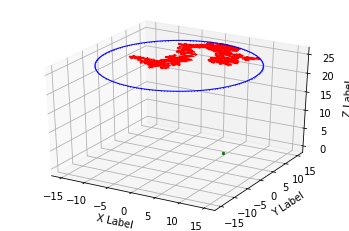

In [373]:
goals_rw_chunk = simulator.RandomWalking()

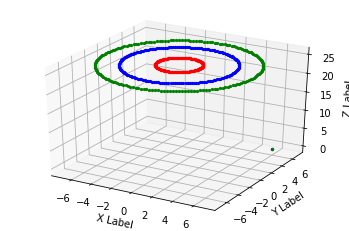

In [364]:
goals_chunk = simulator.CreateTrace()
simulator.ShowPath(goals_chunk)
distance_chunk = simulator.GetDistance(goals_chunk)

In [365]:
class BaseStation:
    def __init__(self, transmit_power, transmission_bandwidth, carrier_frequency,
                 receive_antenna_gain, transmit_antenna_gain):
        self.transmit_power = transmit_power
        self.transmission_bandwidth = transmission_bandwidth
        self.carrier_frequency = carrier_frequency
        self.receive_antenna_gain = receive_antenna_gain
        self.transmit_antenna_gain = transmit_antenna_gain
        self.noise_power = -174 + 10 * np.log10(self.transmission_bandwidth)
        self.light_speed = 300_000_000  
        
        
    def dbm2watt(self, dbm):
        return 10 ** (dbm / 10) / 1000
    
    def watt2dbm(self, watt):
        return 10 * np.log10(1000 * watt)
    
    def FriisEquation(self, distance):
        return self.transmit_power + self.receive_antenna_gain + self.transmit_antenna_gain + \
               20 * np.log10(self.light_speed / (4 * np.pi * distance * self.carrier_frequency))
    
    def CalculateSBR(self, distance):
        noise_power_w = self.dbm2watt(self.noise_power)
        receive_power = self.FriisEquation(distance)
        receive_power_w = self.dbm2watt(receive_power)
        return 10 * np.log10(receive_power_w / noise_power_w)
    
    
base_station = BaseStation(transmit_power=24, transmission_bandwidth=(0.56*(10**9)), carrier_frequency=(60*(10**9)), receive_antenna_gain=3, transmit_antenna_gain=3)



In [366]:
def SIRDatabase(distance_chunk):
#     Create first formule P_(rx,dB)
    SIR_chunk = []
    for distance_array in distance_chunk:
        SIR_array = []
        for distance in distance_array:
            SIR = base_station.CalculateSBR(distance)
            
            SIR_array.append(SIR)
            
        SIR_chunk.append(SIR_array)
    return SIR_chunk

def DrawSIR_all(SIR_chunk):
    timeline = 0
    x_array = []
    y_array = []
    sir_20 = []
    for SIR_array in SIR_chunk:
       
        for SIR in SIR_array:
            x_array.append(SIR)
            y_array.append(timeline)
            sir_20.append(20)
            timeline += 1
           
    plt.plot(y_array, x_array, label='line 1', linewidth=2)
    plt.plot(y_array, sir_20, label='line 1', linewidth=2, c='orange')
                                         
def DrawSIR_sep(SIR_chunk):
    fig, axs = plt.subplots(3)
    fig.suptitle('SIR D')
    timeline = 0
    plot_n = 0
    for SIR_array in SIR_chunk:
        x_array = []
        y_array = []
        for SIR in SIR_array:
            x_array.append(SIR)
            y_array.append(timeline)
            timeline += 1
        axs[plot_n].plot(y_array, x_array, label='line 1', linewidth=2)
        plot_n += 1
        timeline = 0

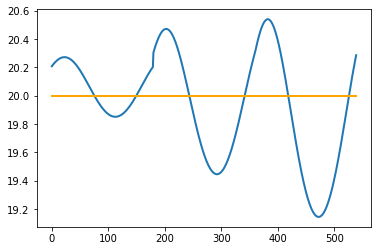

In [367]:
SIR_chunk = SIRDatabase(distance_chunk)
# print("BPLA SIR 1: ", SIR_chunk[0][0], "\tDistance: ", distance_chunk[0][0])
# print("BPLA SIR 2: ", SIR_chunk[1][0], "\tDistance: ", distance_chunk[1][0])
# print("BPLA SIR 3: ", SIR_chunk[2][0], "\tDistance: ", distance_chunk[2][0])
DrawSIR_all(SIR_chunk)
# DrawSIR_sep(SIR_chunk)

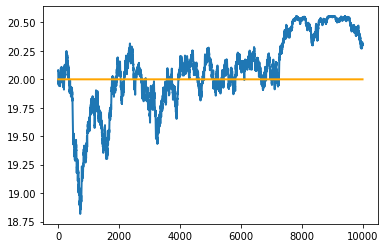

In [374]:
distance_rw_chunk = simulator.GetDistance(goals_rw_chunk)
SIR_rw_chunk = SIRDatabase(distance_rw_chunk)
DrawSIR_all(SIR_rw_chunk)

In [369]:
def SIT_Test():
    sir_distance_array = [[],[]]
    sir_test = []
    for d in range(1, 100):
        SIR = base_station.CalculateSBR(float(d))
        sir_distance_array[0].append(SIR)
        sir_distance_array[1].append(d)
        sir_test.append(20)
        
    plt.plot(sir_distance_array[1], sir_distance_array[0], label='line 1', linewidth=2)
    plt.plot(sir_distance_array[1], sir_test, label='line 1', linewidth=2, c='orange')
    

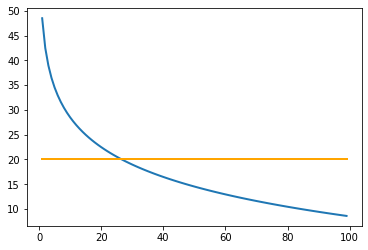

In [370]:
SIT_Test()